In [4]:
! pip install stop_words

In [5]:
import pandas as pd
import string   # we need it for Punctuations removal
from stop_words import get_stop_words  # or we can use from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize # it turn text to list but more faster
# let's import the needed packages
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter

# Step 5: plot sentiment and emotions
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df_st = pd.read_csv("/content/drive/MyDrive/STX_Project/British_reviews_skytrax.csv", index_col= 0)
df_st.head()

,reviews
0,✅ Trip Verified | I was flying to Warsaw for ...
1,✅ Trip Verified | Booked a BA holiday to Marr...
2,✅ Trip Verified | Extremely sub-par service. H...
3,✅ Trip Verified | I virtually gave up on Brit...
4,✅ Trip Verified | I was pleasantly surprised ...


In [8]:
df_tp = pd.read_csv("/content/drive/MyDrive/STX_Project/British_reviews_trustpilot.csv", index_col= 0)
df_tp.head()

,reviews
0,British airways...what a shower of s**t our na...
1,Flew from Heathrow to Jo'burg. Meet and greet ...
2,Flight from Manchester via Heathrow to JFK ret...
3,Flight from Heathrow to Cape Town 18thNovember...
4,Awful customer service. Tried calling to get c...


In [9]:
! pip install stop_words
import string   # we need it for Punctuations removal
from stop_words import get_stop_words   # or we can use from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize # it turn text to list but more faster


# preprocessing function for sentiment analysis
def sentiment_clean_text(text):
    '''
    this function take text and clean it

    Parameters
    ----------
    text : string before preprocessing.

    Returns
    -------
    text : string after preprocessing.

    '''


    # A. first step remove useless text data (if there are any) note: i don't need data before | so I will remove it
    if '|' in text:
        text =  text.split('|')[1]

    # B. second turn letters into lowercase
    text = text.lower()

    # C. third remove all Punctuations.
    text = text.translate(str.maketrans('','',string.punctuation))

    return text


# preprocessing function for emotion analysis
def emotion_clean_text(text):
    '''
    this function take text and clean it then turn it to list of words

    Parameters
    ----------
    text : string

    Returns
    -------
    text_list : list of text words after cleaning.

    '''

    # D. forth step Tokenization and stop words

    # Tokenizaiton: turning string into list of words.
    # Stop words: words without meaning for sentiment analysis.


    # Tokenizaiton
    text = word_tokenize(text,"english")

    # handeling the stop words but what are the stop words
    stop_words = get_stop_words('english') #or we can use stop_words = stopwords.words('english')

    # Removing stop words from the tokenized words list
    text_list = []

    for word in text:
        if word not in stop_words:
            text_list.append(word)


    # return the list of words
    return text_list

In [10]:
def emotion_maping (file,di):
    '''
    this function take emotions file and store emotions in dictionary

    Parameters
    ----------
    file : emotions file

    Returns
    -------
    di : emotions dictionary.

    '''
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        di[word] = emotion

    return di


In [11]:
# let's import the needed packages
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# function to carry out the
def sentiment_analyze(text):

    scores = SentimentIntensityAnalyzer().polarity_scores(text) # return dictionary of scores

    if (scores['neg'] > scores['pos']):

        return 0

    else:
        return 1

In [12]:
! pip install nltk

In [13]:
# define needed data structures
# !apt install ntlk
# import nltk
# ntlk.download(vader_lexicon)
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
nltk.download('punkt')

cleaned_text = ""
temp_emotion_list = []
score = 0
emotion_dict = {}
words_score_dict = {}
moods_list_st = []
moods_list_tp = []

# create category list for better understanding
airline_main_categories = ['flight','service','seat','food','crew','time','good','class','cabin','seats','staff','business']
temp_category_list = []

# get the emotion dictionary ready
emotion_file = open("/content/drive/MyDrive/STX_Project/emotion.txt",'r',encoding='utf-8')
emotion_dict = emotion_maping(emotion_file,emotion_dict)
emotion_file.close()

# ------------------------ loop for the skytrx Dataframe ------------------------------


# loop for all reviews in Skytrax dataFrame
for i in range(len(df_st)):

    # get the review of index i
    text = str(df_st['reviews'][i])

    # step 1: let's clean the text and assign cleaned list to dataFrame
    # simple clean
    cleaned_text= sentiment_clean_text(text)

    #Step 2: sentiment Analysis

import nltk
nltk.download('vader_lexicon')
!pip install NTLK downloader

score = sentiment_analyze(cleaned_text)
moods_list_st.append(score)


    # Step 3: advanced clean for emotions
cleaned_text_list = emotion_clean_text(cleaned_text)
df_st['reviews'][i] = cleaned_text_list


    # Step 4: emotion list builder
for word in emotion_dict.keys():
        if word in cleaned_text_list:
            temp_emotion_list.append(emotion_dict[word])

    # Step 5: category list builder
for cat in airline_main_categories:
        if cat in cleaned_text_list:
            temp_category_list.append(cat)

# now let's create new column for moods for skytrax
#df_st['mood'] = moods_list_st


# ------------------------ loop for the trustpilot Dataframe ------------------------------

# loop for all reviews in trustpilot dataFrame
for i in range(len(df_tp)):

    # get the review of index i
    text = str(df_tp['reviews'][i])

    # step 1: let's clean the text and assign cleaned list to dataFrame
    # simple clean
    cleaned_text= sentiment_clean_text(text)

    #Step 2: sentiment Analysis
    score = sentiment_analyze(cleaned_text)
    moods_list_tp.append(score)


    # Step 3: advanced clean for emotions
    cleaned_text_list = emotion_clean_text(cleaned_text)
    df_tp['reviews'][i] = cleaned_text_list


    # Step 4: emotion list builder
    for word in emotion_dict.keys():
        if word in cleaned_text_list:
            temp_emotion_list.append(emotion_dict[word])

    # Step 5: category list builder
    for cat in airline_main_categories:
        if cat in cleaned_text_list:
            temp_category_list.append(cat)

# now let's create new column for moods trust pilot dataframe
df_tp['mood'] = moods_list_tp

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


ERROR: Could not find a version that satisfies the requirement NTLK (from versions: none)
ERROR: No matching distribution found for NTLK


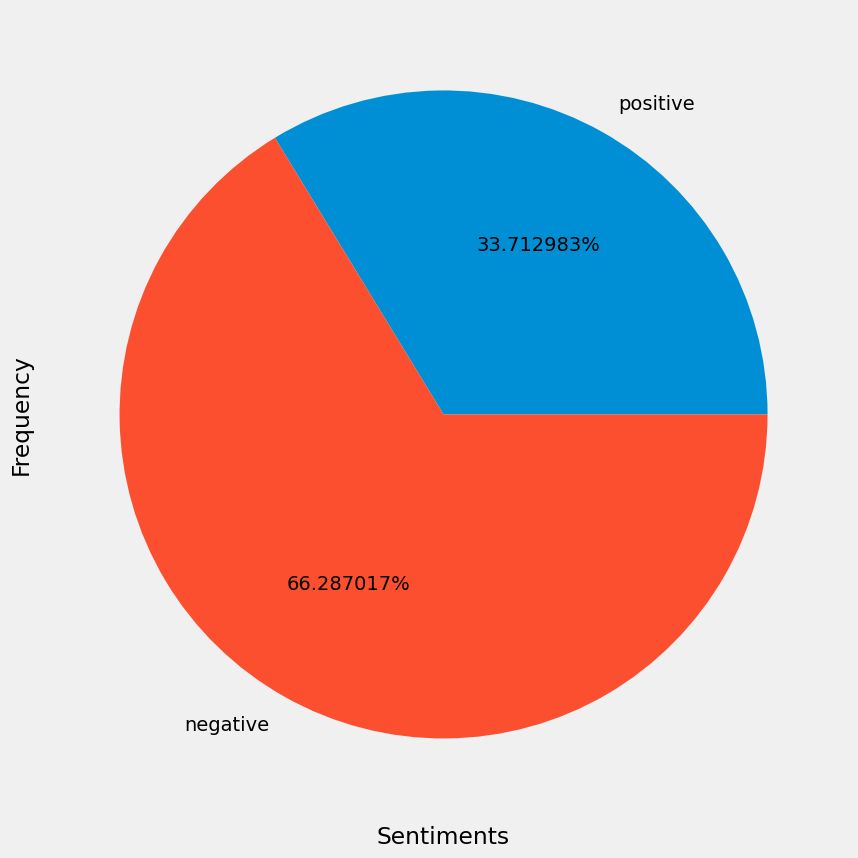

In [14]:
from collections import Counter

# Step 5: plot sentiment and emotions
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


# get summary dictionary for sentiment
moods_list_all = moods_list_st + moods_list_tp
mood_summary = dict(Counter(moods_list_all))

# rename dictionary keys before ploting
mood_summary['positive'] = mood_summary.pop(1)
mood_summary['negative'] = mood_summary.pop(0)

fig, ax = plt.subplots()
#ax.bar(mmod_summary.keys(), mmod_summary.values())
ax.pie( mood_summary.values(), labels = mood_summary.keys(), autopct='%.6f%%')

# change the width and length of plot
fig.set_figwidth(10)
fig.set_figheight(10)
# label the plot
plt.xlabel('Sentiments')
plt.ylabel('Frequency')
#plt.savefig('Sentiments.png')
plt.show()

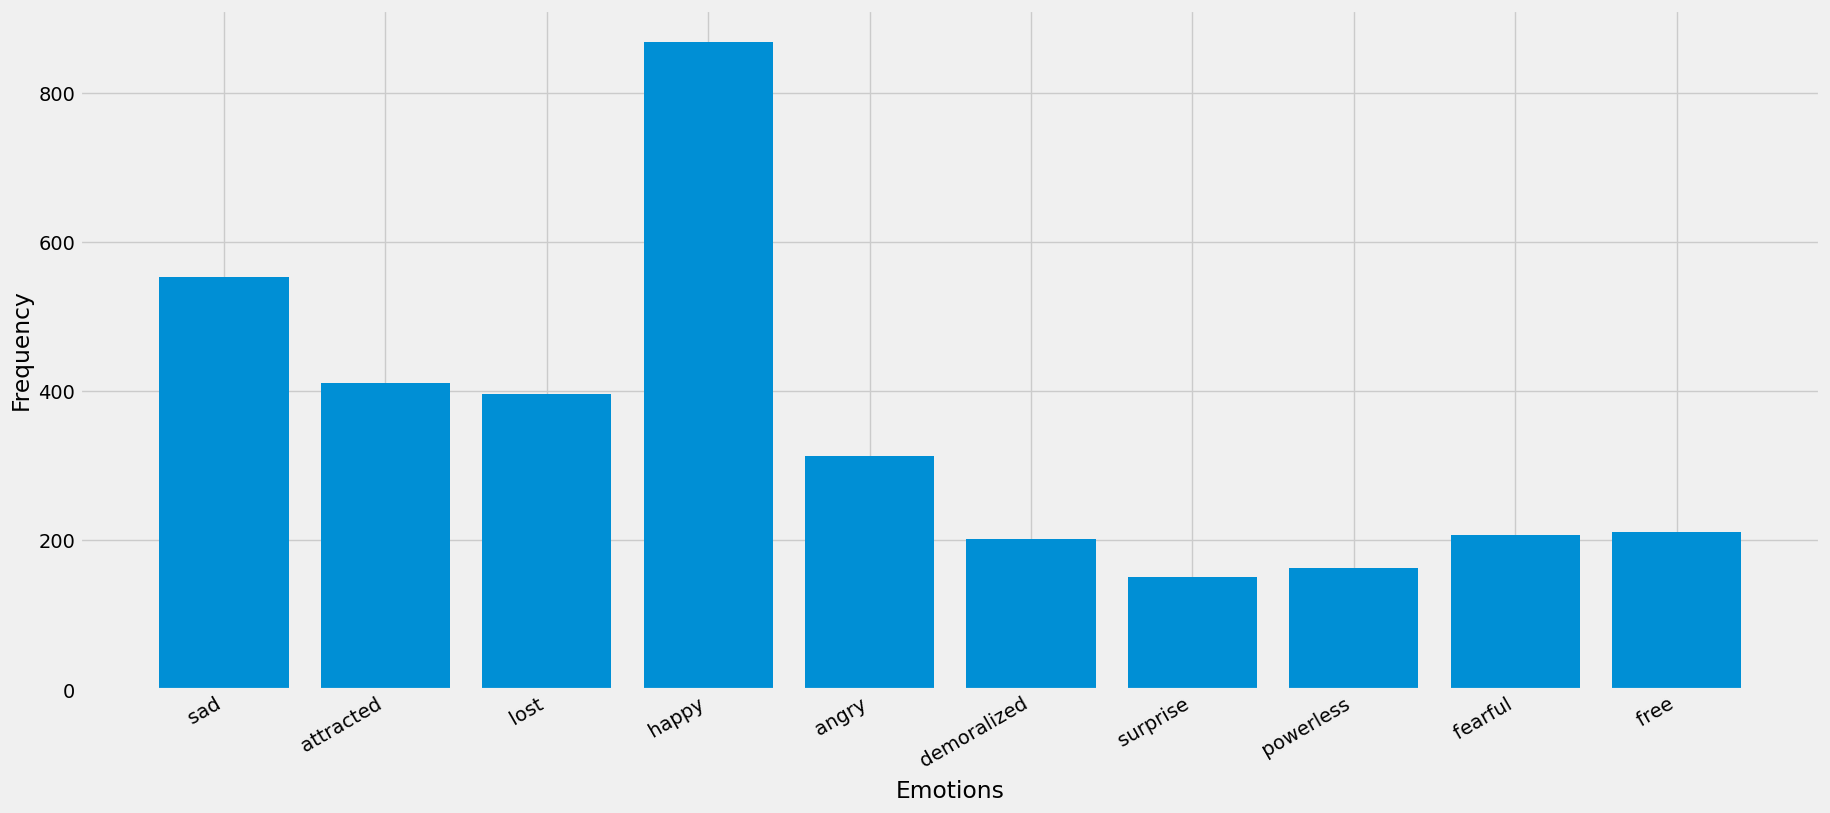

In [15]:
# turn the emotion list into dictionary
words_score_dict = dict(Counter(temp_emotion_list))

# now let's go more Specifically and just choose emotions with freq more than 150
more_than_150_emotions = dict( (key, value) for (key, value) in words_score_dict.items() if value > 150 )


fig, ax = plt.subplots()
#ax.bar(words_score_dict.keys(), words_score_dict.values())
ax.bar(more_than_150_emotions.keys(), more_than_150_emotions.values())

# the fit the text undre graph
fig.autofmt_xdate()
# change the width and length of plot
fig.set_figwidth(20)
fig.set_figheight(10)

# label the plot
plt.xlabel('Emotions')
plt.ylabel('Frequency')

#save the graph and show it
#plt.savefig('More_than_150_emotions.png')
plt.show()


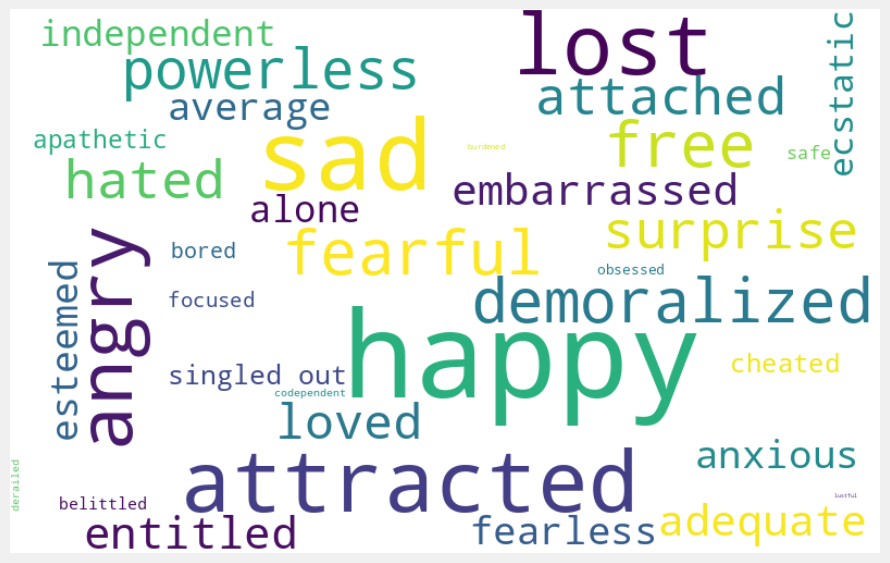

In [16]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=110).generate_from_frequencies(words_score_dict)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

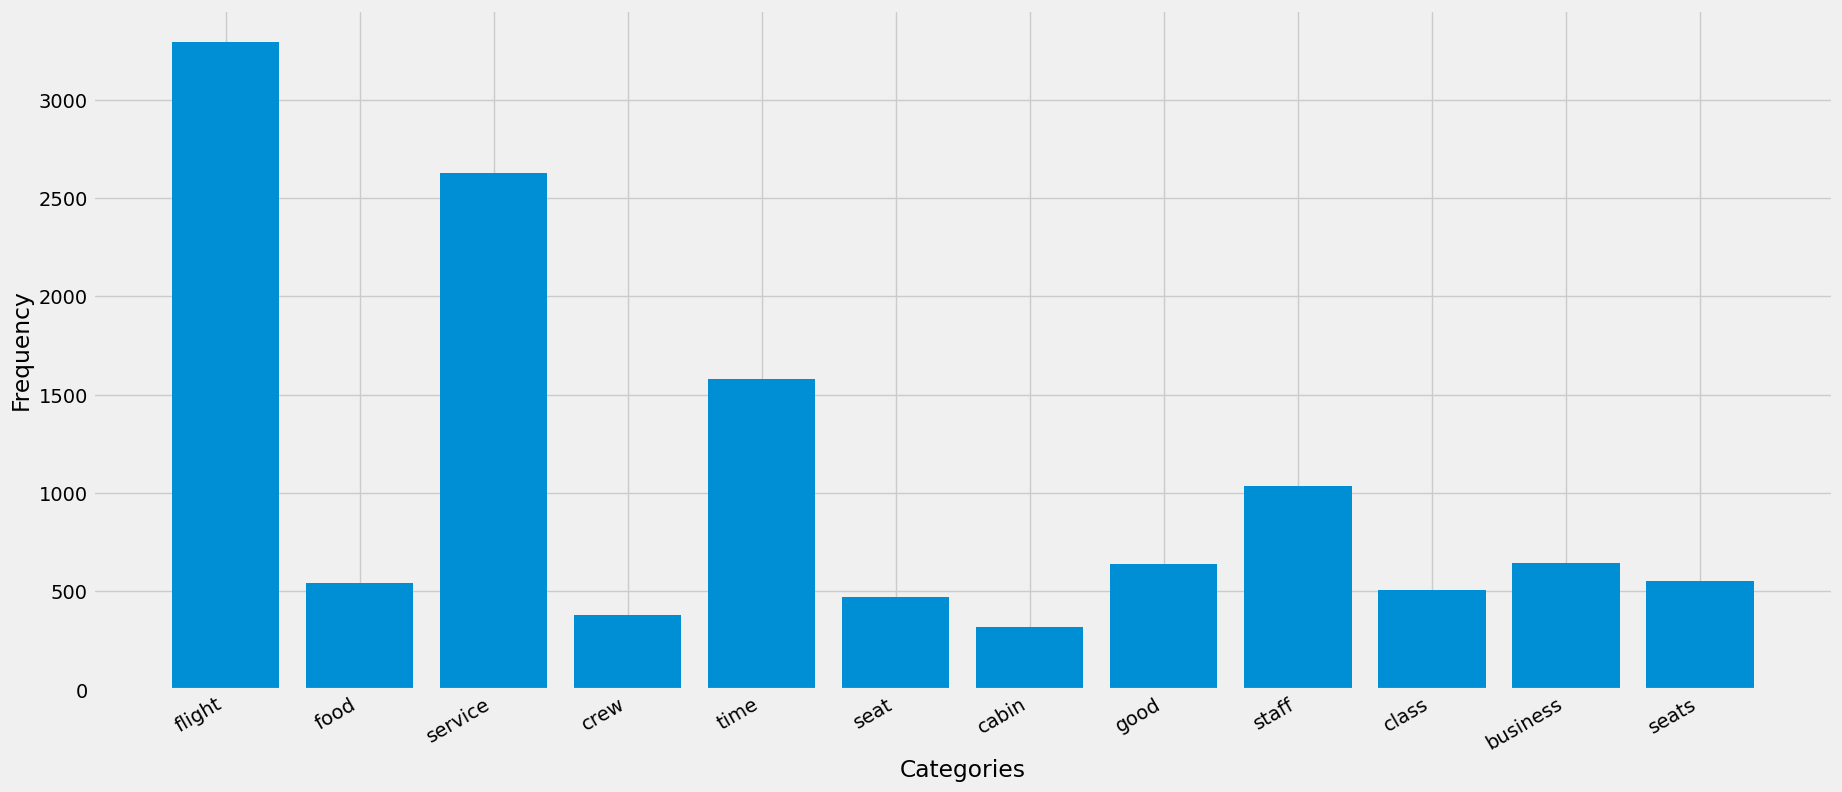

In [17]:
# turn the emotion list into dictionary
cat_score_dict = dict(Counter(temp_category_list))

# now let's go more Specifically and just choose emotions with freq more than 10
more_than_10_cat = dict( (key, value) for (key, value) in cat_score_dict.items() if value > 10 )


fig, ax = plt.subplots()
ax.bar(more_than_10_cat.keys(), more_than_10_cat.values())

# the fit the text undre graph
fig.autofmt_xdate()

# change the width and length of plot
fig.set_figwidth(20)
fig.set_figheight(10)

# label the plot
plt.xlabel('Categories')
plt.ylabel('Frequency')
#save the graph and show it
#plt.savefig('More_than_10_categories.png')
plt.show()

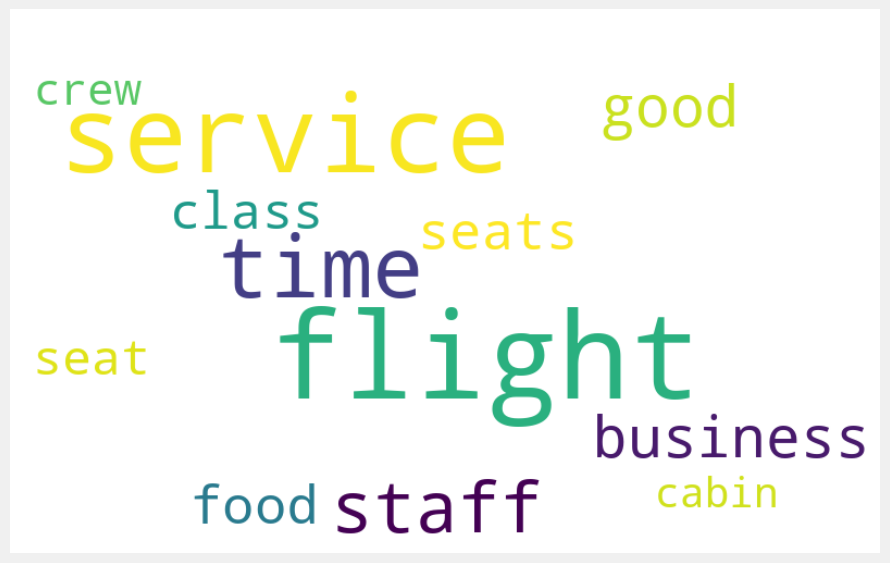

In [18]:
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=110).generate_from_frequencies(cat_score_dict)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()